In [ ]:
#content & calobrative filtering algorithm and high class recommendation system
!pip install -q tensorflow-recommenders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv('/content/df.csv')
df.head()



,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.555800e+04,45558.000000,45558.000000,4.555800e+04,45558.000000,45558.000000,45558.000000
mean,4.257162e+06,107981.220927,2.949126,1.128389e+07,95.017472,5.637115,110.504280
std,1.746352e+07,112069.609297,6.007230,6.452507e+07,37.526643,1.897338,491.833183
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26264.500000,0.402940,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,59799.500000,1.150270,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,156685.750000,3.743562,0.000000e+00,107.000000,6.800000,35.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
df.isnull().sum()

,0
adult,0
budget,0
genres,0
id,0
original_language,10
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
adult,0
budget,0
genres,0
id,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
def get_text(text, obj='name'):
    text = literal_eval(text)

    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

# New columns
df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

In [ ]:
df.head() #cleaned data

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


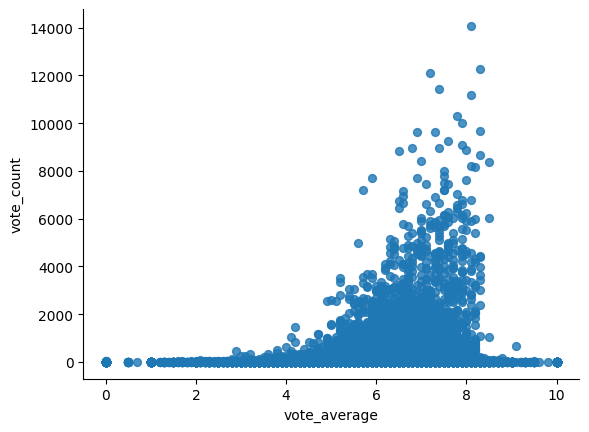

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='vote_average', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**DATA VISUALIZATION**

In [ ]:
df['adult'].value_counts()

,count
adult,
False,42365
True,8


<ipython-input-12-2b96fe3a4dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['budget'] = pd.to_numeric(df_plot['budget'], errors='coerce') #Convert 'budget' column to numeric
<ipython-input-12-2b96fe3a4dea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['revenue'] = pd.to_numeric(df_plot['revenue'], errors='coerce') #Convert 'revenue' column to numeric
<ipython-input-12-2b96fe3a4dea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

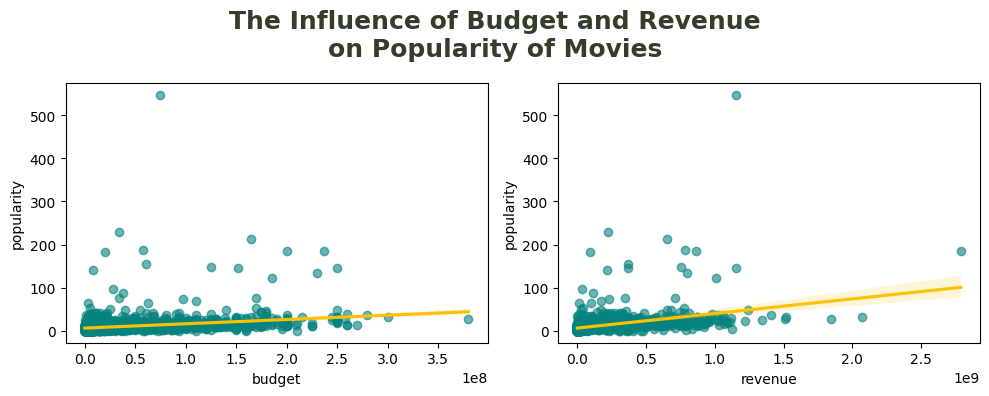

In [ ]:
df_plot= df[(df['budget'] != 0) & (df['revenue'] != 0)]
df_plot['budget'] = pd.to_numeric(df_plot['budget'], errors='coerce') #Convert 'budget' column to numeric
df_plot['revenue'] = pd.to_numeric(df_plot['revenue'], errors='coerce') #Convert 'revenue' column to numeric
df_plot['popularity'] = pd.to_numeric(df_plot['popularity'], errors='coerce') # Convert 'popularity' to numeric
df_plot = df_plot.dropna(subset=['budget', 'revenue', 'popularity']) # drop rows with NaN values after conversion.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

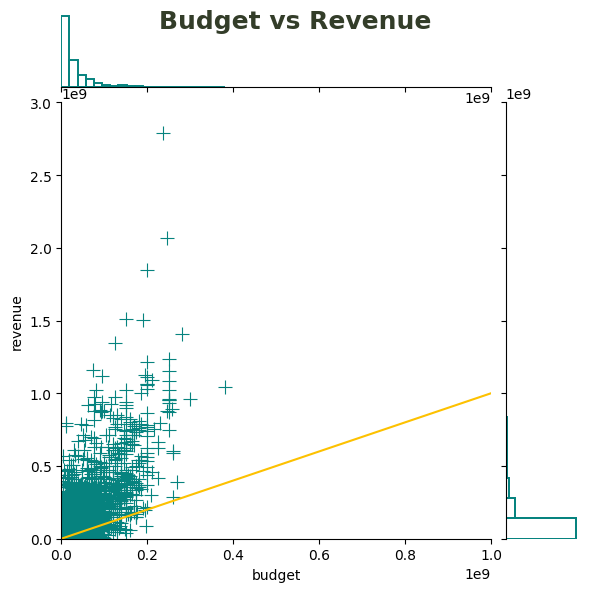

In [ ]:
ax= sns.jointplot(data=df[(df['budget'] != 0) & (df['revenue'] != 0)], x='budget', y='revenue',
                   marker="+", s=100, marginal_kws=dict(bins=20, fill=False), color='#06837f')
ax.fig.suptitle('Budget vs Revenue', fontsize=18, weight=600, color='#333d29')
ax.ax_joint.set_xlim(0, 1e9)
ax.ax_joint.set_ylim(0, 3e9)
ax.ax_joint.axline((1,1), slope=1, color='#fdc100')

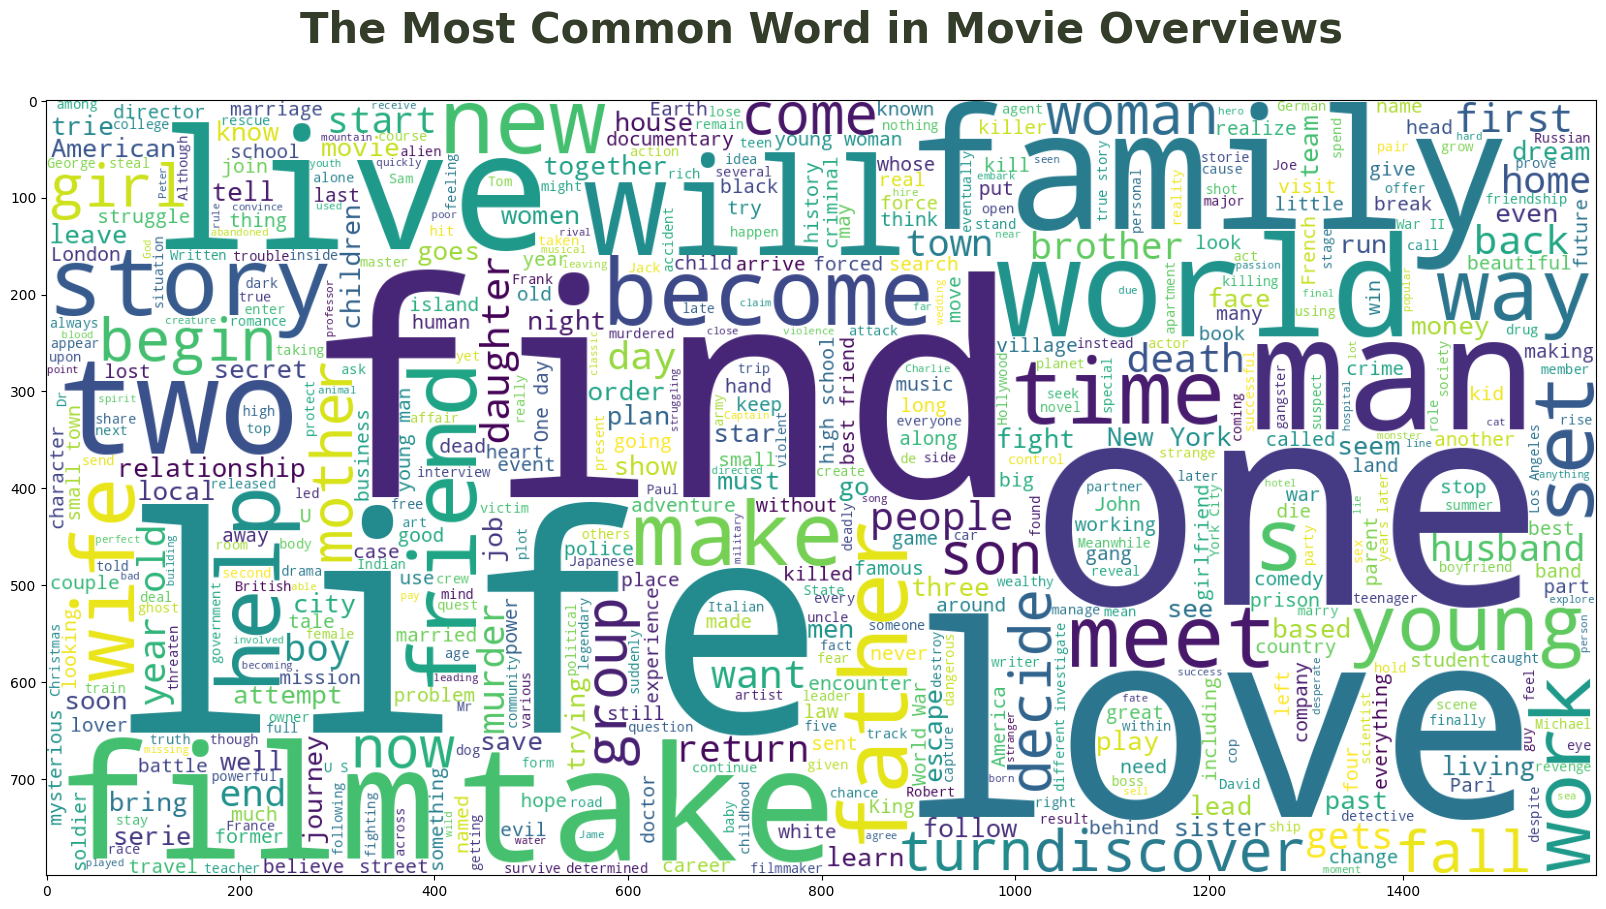

In [ ]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['overview']))

plt.imshow(wc)

In [ ]:
df.columns
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


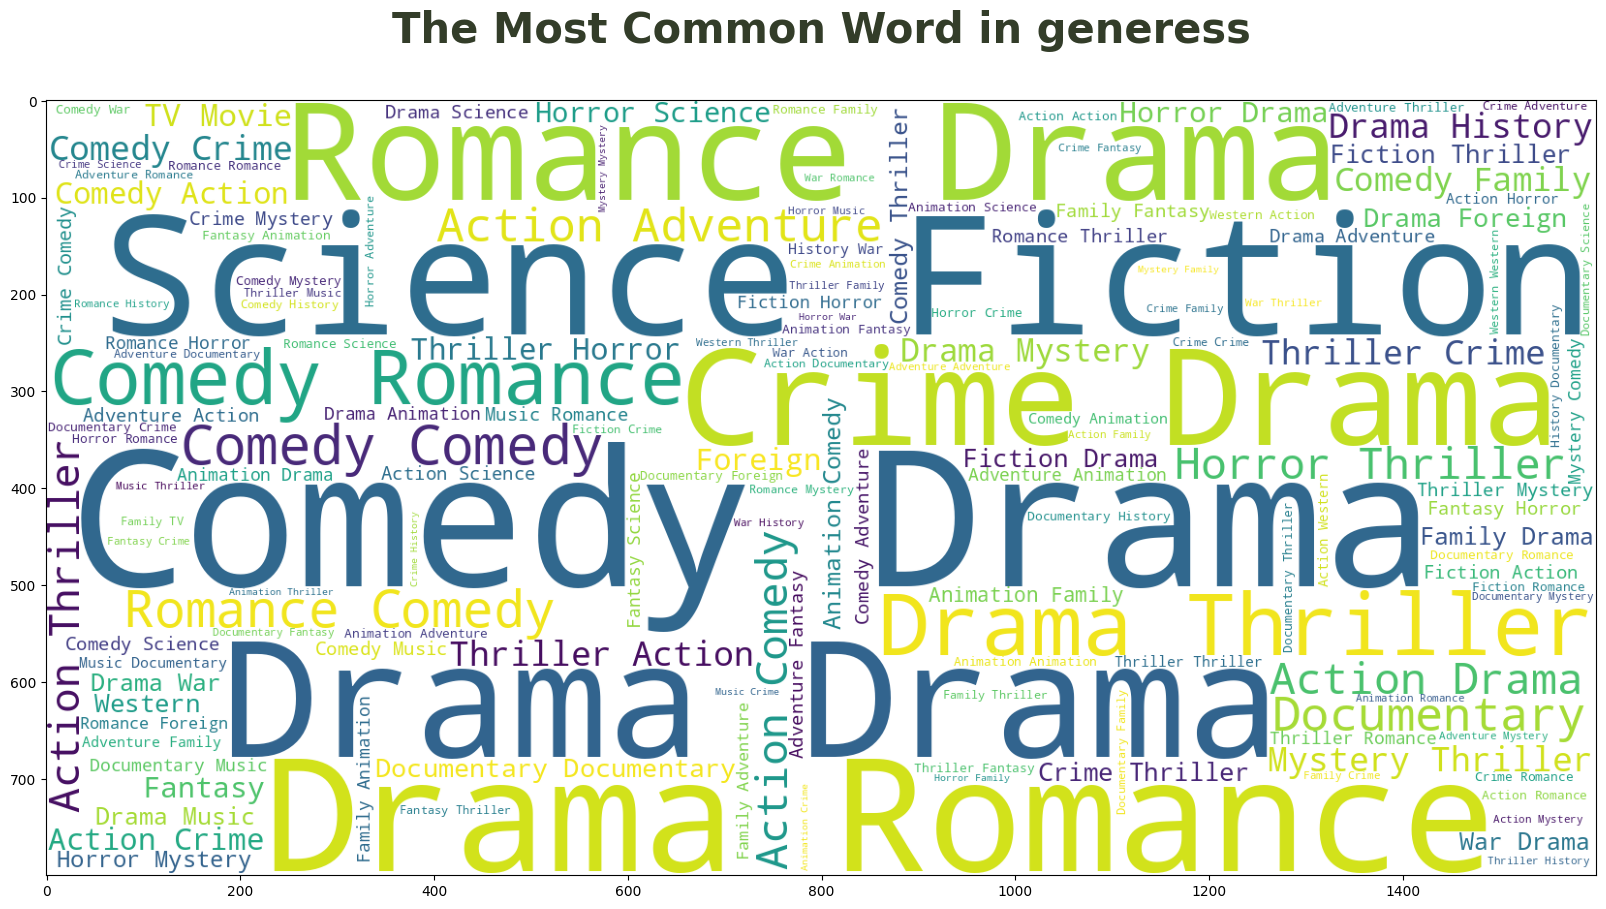

In [ ]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in generess\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['genres']))

plt.imshow(wc)

<ipython-input-17-32dd93b85863>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])


(-1.25, 1.25, -1.25, 1.25)

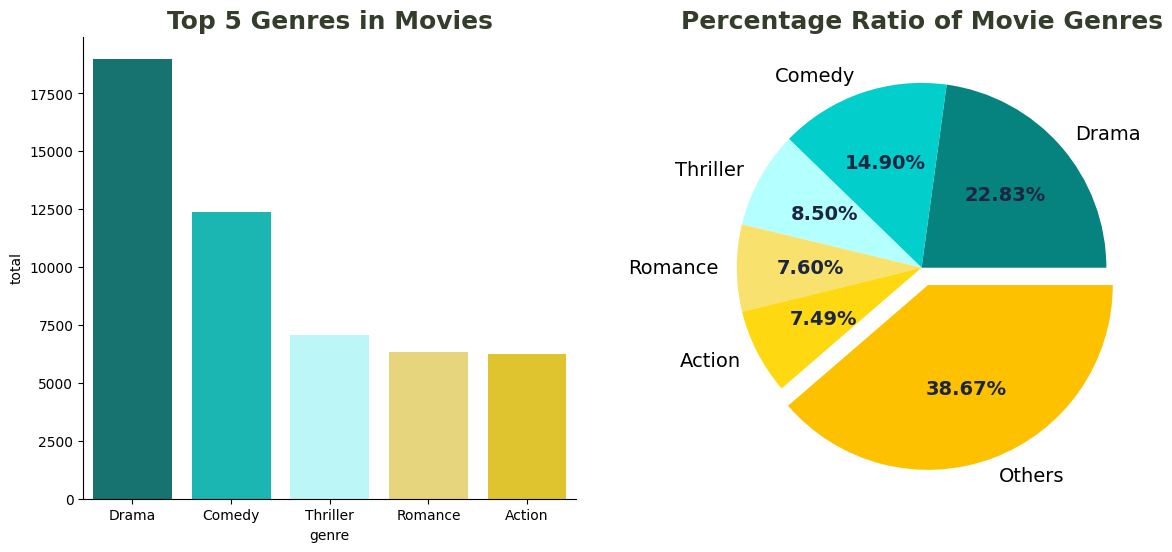

In [ ]:
genres_list=[]
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

In [ ]:
original_language_list=[]
for i in df['original_language']:
    original_language_list.extend(i.split(', '))

spoken_languages_list = []
for i in df['spoken_languages']:
    if i != '':
        spoken_languages_list.extend(i.split(', '))

actors_list = []
for i in df['actors']:
    if i != '':
        actors_list.extend(i.split(', '))

crew_list = []
for i in df['crew']:
    if i != '':
        crew_list.extend(i.split(', '))

company_list = []
for i in df['production_companies']:
    if i != '':
        company_list.extend(i.split(', '))

country_list = []
for i in df['production_countries']:
    if i != '':
        country_list.extend(i.split(', '))

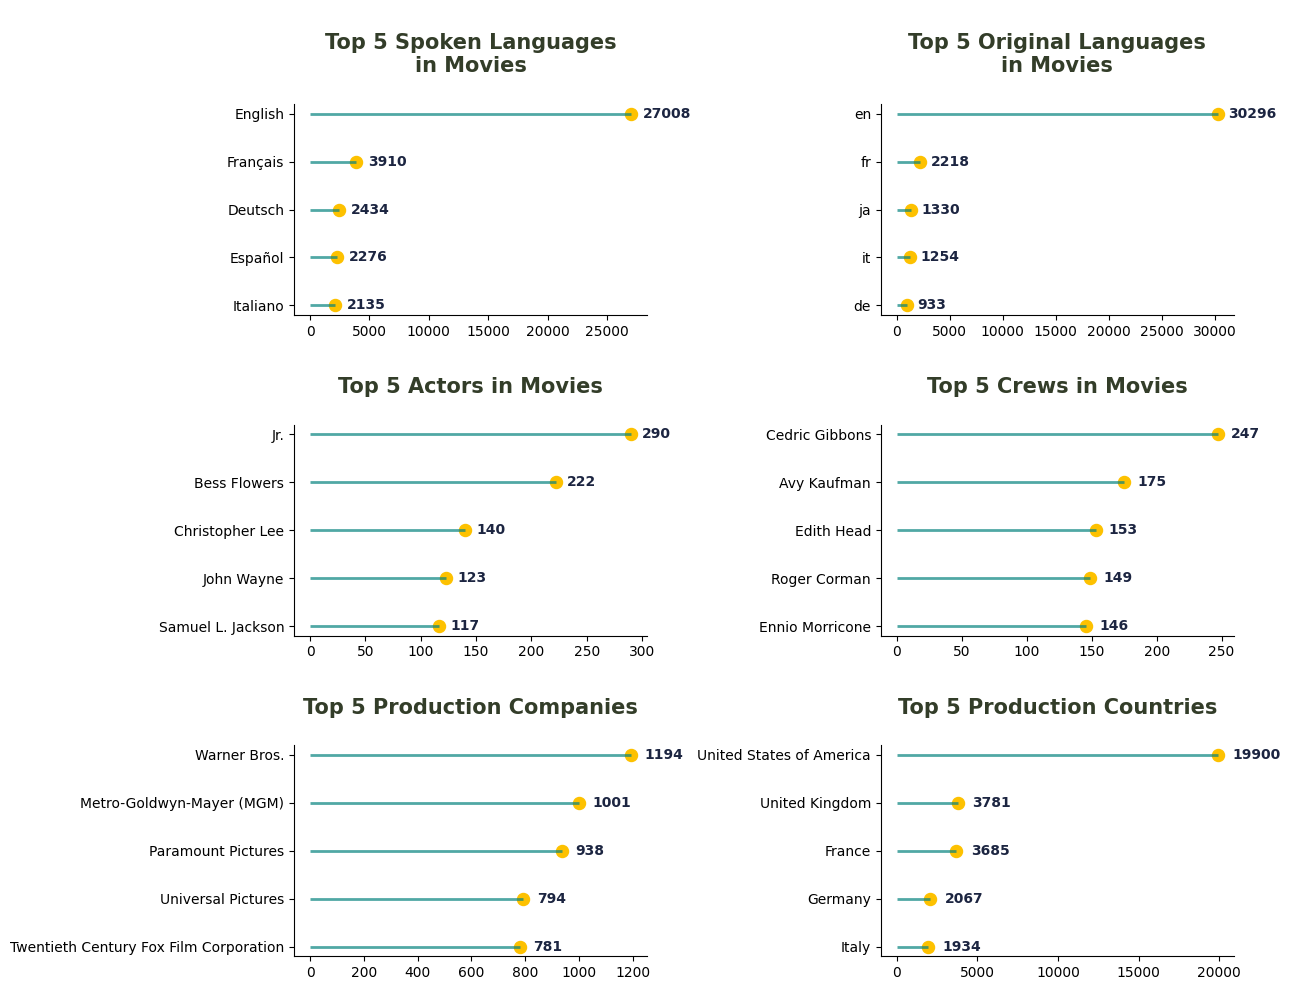

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

# Spoken language plot
df_plot1 = pd.DataFrame(Counter(spoken_languages_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,0].hlines(y=df_plot1['language'], xmin=0, xmax=df_plot1['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_plot1['total'], y=df_plot1['language'], s = 75, color='#fdc100')
axes[0,0].set_title('\nTop 5 Spoken Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot1['total']):
    axes[0,0].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Original Language plot
df_plot2 = pd.DataFrame(Counter(original_language_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,1].hlines(y=df_plot2['language'], xmin=0, xmax=df_plot2['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_plot2['total'], y=df_plot2['language'], s = 75, color='#fdc100')
axes[0,1].set_title('\nTop 5 Original Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot2['total']):
    axes[0,1].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Actor plot
df_plot3 = pd.DataFrame(Counter(actors_list).most_common(5), columns=['actor', 'total']).sort_values(by='total', ascending=True)
axes[1,0].hlines(y=df_plot3['actor'], xmin=0, xmax=df_plot3['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_plot3['total'], y=df_plot3['actor'], s = 75, color='#fdc100')
axes[1,0].set_title('\nTop 5 Actors in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot3['total']):
    axes[1,0].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Crew plot
df_plot4 = pd.DataFrame(Counter(crew_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[1,1].hlines(y=df_plot4['name'], xmin=0, xmax=df_plot4['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_plot4['total'], y=df_plot4['name'], s = 75, color='#fdc100')
axes[1,1].set_title('\nTop 5 Crews in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot4['total']):
    axes[1,1].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Company plot
df_plot5 = pd.DataFrame(Counter(company_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,0].hlines(y=df_plot5['name'], xmin=0, xmax=df_plot5['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,0].scatter(x=df_plot5['total'], y=df_plot5['name'], s = 75, color='#fdc100')
axes[2,0].set_title('\nTop 5 Production Companies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot5['total']):
    axes[2,0].text(value+50, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Country plot
df_plot6 = pd.DataFrame(Counter(country_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,1].hlines(y=df_plot6['name'], xmin=0, xmax=df_plot6['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,1].scatter(x=df_plot6['total'], y=df_plot6['name'], s = 75, color='#fdc100')
axes[2,1].set_title('\nTop 5 Production Countries\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot6['total']):
    axes[2,1].text(value+900, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

sns.despine()
plt.tight_layout()

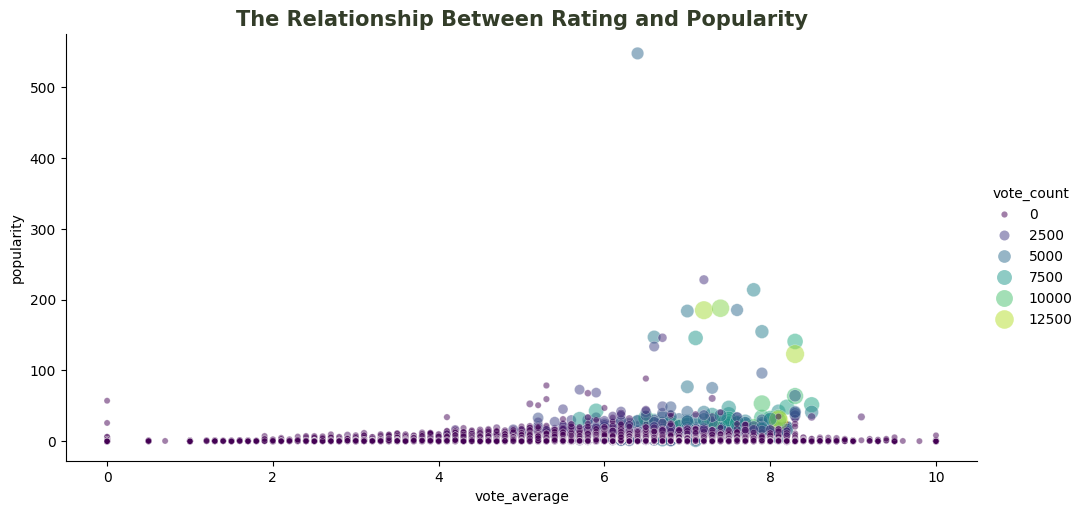

In [ ]:

sns.relplot(data=df, x='vote_average', y='popularity',
            size='vote_count', hue='vote_count', # Added hue for color mapping
            sizes=(20, 200), alpha=.5, aspect=2,
            palette='viridis')  # Using a colormap

plt.title('The Relationship Between Rating and Popularity',
          fontsize=15, weight=600, color='#333d29')
plt.show()

<ipython-input-21-65d2878ae6f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
<ipython-input-21-65d2878ae6f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
<ipython-input-21-65d2878ae6f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=[

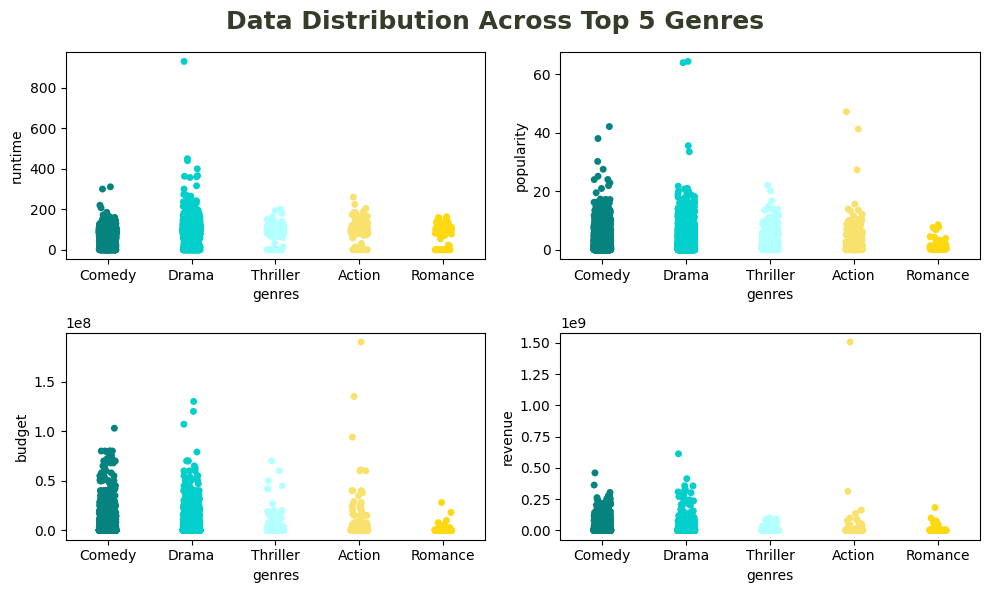

In [ ]:
df_plot=pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()


**Insights:**
The movie genre that has the longest runtime is drama
The least popular genre in the top 5 is romance
Action movies spent more money than the rest of the movies
One of the action movies got a vast profit compared to the others


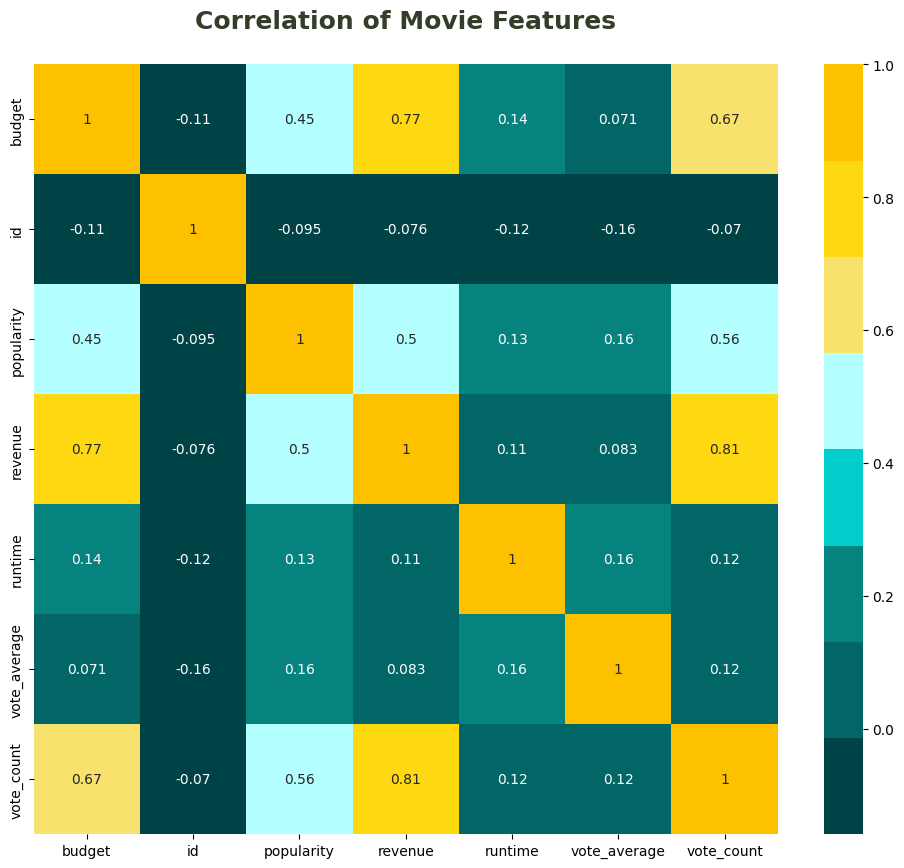

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(correlation_matrix, annot=True,
            cmap=['#004346', '#036666', '#06837f', '#02cecb',
                  '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])
plt.show()

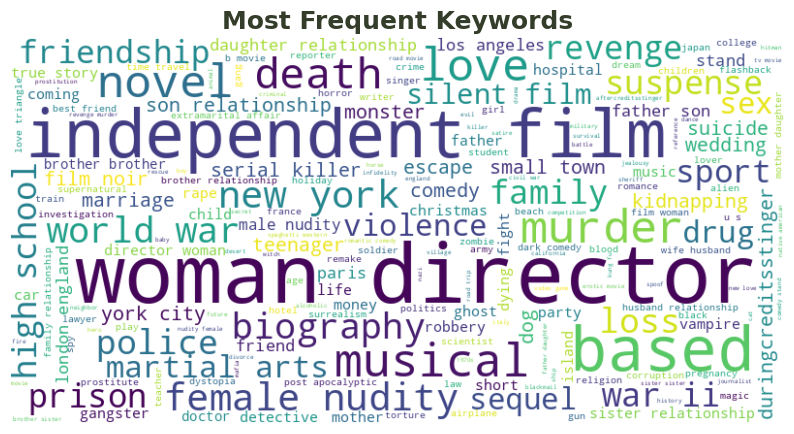

In [ ]:


keyword_text = ' '.join(df['keywords'].astype(str).apply(lambda x: ' '.join(x.split(', '))))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Keywords', fontsize=18, weight=600, color='#333d29')
plt.show()

In [ ]:
df_plot.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."
25,False,0,Drama,16420,en,Othello,The evil Iago pretends to be friend of Othello...,1.845899,"Columbia Pictures, Castle Rock Entertainment",Italy,...,0.0,123.0,English,"Envy, greed, jealousy and love.",7.0,33.0,"shakespeare, jealousy, friends, moor","William Shakespeare, Oliver Parker, Oliver Parker","Othello, Desdemona, Iago, Cassio, Bianca, Rode...","Laurence Fishburne, Irène Jacob, Kenneth Brana..."
34,False,11000000,Drama,687,en,Dead Man Walking,A justice drama based on a true story about a ...,6.891317,"Havoc, PolyGram Filmed Entertainment, Working ...","United States of America, United Kingdom",...,39363635.0,122.0,English,,7.3,350.0,"prison, rape, socially deprived family, penalt...","Roger Deakins, Tim Robbins, Tim Robbins, Tim R...","Sister Helen Prejean, Matthew Poncelet, Hilton...","Susan Sarandon, Sean Penn, Robert Prosky, Raym..."
38,False,0,Drama,34615,en,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,0.894647,"Miramax, Distant Horizon, Alpine Pty Limited",South Africa,...,676525.0,106.0,English,,6.7,13.0,south africa,"Darrell James Roodt, Ronald Harwood, Alan Pato...","Rev. Stephen Kumalo, John Kumalo, Ian Jarvis, ...","James Earl Jones, Charles S. Dutton, Jack Robi..."
53,False,0,Drama,97406,en,Georgia,"Sadie looks up to her older sister Georgia, a ...",4.093443,"Miramax Films, CiBy 2000","France, United States of America",...,0.0,115.0,English,The toughest act to follow was their dreams.,6.1,15.0,"alcohol, artist, music, drug, band","Ulu Grosbard, Barbara Turner","Sadie Flood, Georgia Flood, Jake, Axel Goldman...","Jennifer Jason Leigh, Mare Winningham, Ted Lev..."


In [ ]:
df_plot['genres'].value_counts()

,count
genres,
Drama,4692
Comedy,3298
Thriller,413
Action,265
Romance,88


<ipython-input-26-57622c5a58a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='genres', y='popularity', palette='viridis')


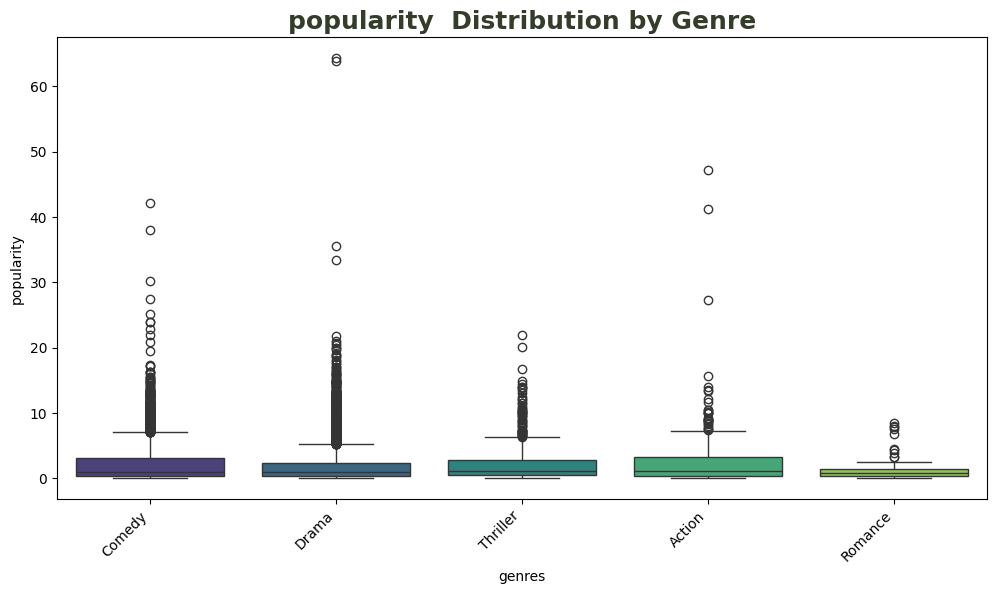

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='genres', y='popularity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('popularity  Distribution by Genre', fontsize=18, weight=600, color='#333d29')
plt.show()



<ipython-input-27-75686904eb8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='genres', y='vote_average', palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


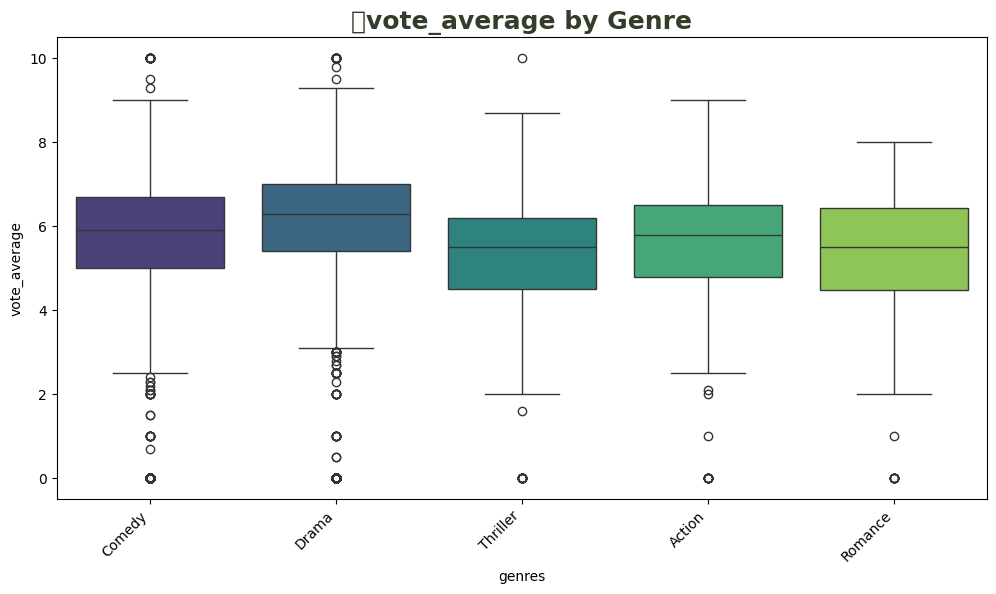

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='genres', y='vote_average', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('	vote_average by Genre', fontsize=18, weight=600, color='#333d29')
plt.show()

<ipython-input-28-32d2fb0b974a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for company, count in company_counts],


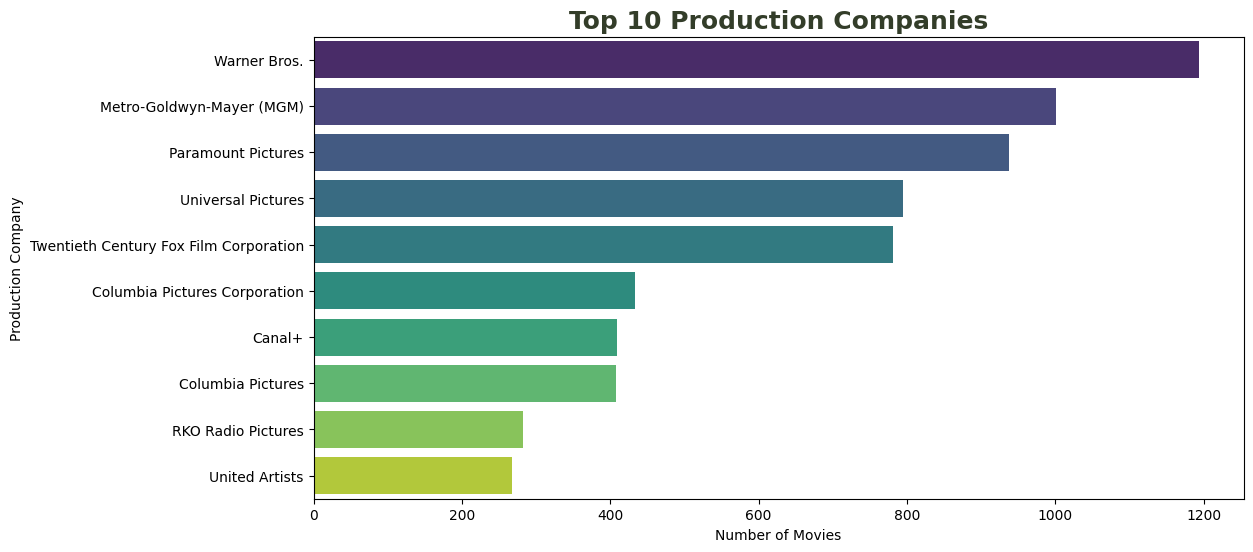

In [ ]:
from collections import Counter

production_companies = [company for companies in df['production_companies'].str.split(', ') for company in companies if company]
company_counts = Counter(production_companies).most_common(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=[count for company, count in company_counts],
            y=[company for company, count in company_counts],
            palette='viridis')
plt.title('Top 10 Production Companies', fontsize=18, weight=600, color='#333d29')
plt.xlabel('Number of Movies')
plt.ylabel('Production Company')
plt.show()

In [ ]:
#recommendation system using content based filtering
# W=R.V+C.m/v+m
R=df['vote_average']
v = df['vote_count']
# We will only consider movies that have more votes than at least 80% of the movies in our dataset
m = df['vote_count'].quantile(0.8)
C = df['vote_average'].mean()

df['weighted_average'] = (R*v + C*m)/(v+m)
df['weighted_average']

,weighted_average
0,7.680912
1,6.874214
2,6.198341
3,5.832503
4,5.689566
...,...
42368,5.680053
42369,5.612745
42370,5.840051
42371,5.654171


In [ ]:
scaler=MinMaxScaler()
scaled = scaler.fit_transform(df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = df['original_title']
weighted_df.head()

,popularity,weighted_average
original_title,,
Toy Story,0.040087,0.811158
Jumanji,0.031079,0.681205
Grumpier Old Men,0.021394,0.572328
Waiting to Exhale,0.007049,0.513395
Father of the Bride Part II,0.015320,0.490369


In [ ]:
weighted_df['score']=weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [ ]:
weighted_df=weighted_df.sort_values('score', ascending=False)
weighted_df

,popularity,weighted_average,score
original_title,,,
Minions,1.000000,0.603532,0.841413
Big Hero 6,0.390602,0.827561,0.565386
Baby Driver,0.416507,0.727736,0.540998
Guardians of the Galaxy Vol. 2,0.338511,0.794867,0.521054
Pulp Fiction,0.257449,0.908395,0.517827
...,...,...,...
Birdemic: Shock and Terror,0.004621,0.155452,0.064953
Epic Movie,0.010136,0.141691,0.062758
Battlefield Earth,0.009638,0.127443,0.056760


In [ ]:
content_df=df[['original_title', 'adult', 'genres', 'overview', 'production_companies', 'tagline', 'keywords', 'crew', 'characters', 'actors']]

In [ ]:
content_df.head()

,original_title,adult,genres,overview,production_companies,tagline,keywords,crew,characters,actors
0,Toy Story,False,"Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...",Pixar Animation Studios,,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,Jumanji,False,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,"TriStar Pictures, Teitler Film, Interscope Com...",Roll the dice and unleash the excitement!,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,Grumpier Old Men,False,"Romance, Comedy",A family wedding reignites the ancient feud be...,"Warner Bros., Lancaster Gate",Still Yelling. Still Fighting. Still Ready for...,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,Waiting to Exhale,False,"Comedy, Drama, Romance","Cheated on, mistreated and stepped on, the wom...",Twentieth Century Fox Film Corporation,Friends are the people who let you be yourself...,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,Father of the Bride Part II,False,Comedy,Just when George Banks has recovered from his ...,"Sandollar Productions, Touchstone Pictures",Just When His World Is Back To Normal... He's ...,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [ ]:
def separate(text):
    clean_text = []
    for t in text.split(','):
        cleaned = re.sub('\(.*\)', '', t) # Remove text inside parentheses
        cleaned = cleaned.translate(str.maketrans('','', string.digits))
        cleaned = cleaned.replace(' ', '')
        cleaned = cleaned.translate(str.maketrans('','', string.punctuation)).lower()
        clean_text.append(cleaned)
    return ' '.join(clean_text)

def remove_punc(text):
    cleaned = text.translate(str.maketrans('','', string.punctuation)).lower()
    clean_text = cleaned.translate(str.maketrans('','', string.digits))
    return clean_text

In [ ]:

content_df['genres'] = content_df['genres'].apply(remove_punc)
content_df['overview'] = content_df['overview'].apply(remove_punc)
content_df['production_companies'] = content_df['production_companies'].apply(separate)
content_df['tagline'] = content_df['tagline'].apply(remove_punc)
content_df['keywords'] = content_df['keywords'].apply(separate)
content_df['crew'] = content_df['crew'].apply(separate)
content_df['characters'] = content_df['characters'].apply(separate)
content_df['actors'] = content_df['actors'].apply(separate)
print(content_df.head())
content_df['bag_of_words'] = ''
# Convert all columns to strings before joining
content_df['bag_of_words'] = content_df[content_df.columns[1:]].apply(lambda x: ' '.join(x.astype(str)), axis=1)
content_df.set_index('original_title', inplace=True)
content_df = content_df[['bag_of_words']]
content_df.head()

<ipython-input-36-379b6a91b34d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['genres'] = content_df['genres'].apply(remove_punc)
<ipython-input-36-379b6a91b34d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['overview'] = content_df['overview'].apply(remove_punc)
<ipython-input-36-379b6a91b34d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

                original_title  adult                    genres  \
0                    Toy Story  False   animation comedy family   
1                      Jumanji  False  adventure fantasy family   
2             Grumpier Old Men  False            romance comedy   
3            Waiting to Exhale  False      comedy drama romance   
4  Father of the Bride Part II  False                    comedy   

                                            overview  \
0  led by woody andys toys live happily in his ro...   
1  when siblings judy and peter discover an encha...   
2  a family wedding reignites the ancient feud be...   
3  cheated on mistreated and stepped on the women...   
4  just when george banks has recovered from his ...   

                                production_companies  \
0                              pixaranimationstudios   
1  tristarpictures teitlerfilm interscopecommunic...   
2                           warnerbros lancastergate   
3                 twentiethcenturyfo

<ipython-input-36-379b6a91b34d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['bag_of_words'] = content_df[content_df.columns[1:]].apply(lambda x: ' '.join(x.astype(str)), axis=1)


,bag_of_words
original_title,
Toy Story,False animation comedy family led by woody and...
Jumanji,False adventure fantasy family when siblings j...
Grumpier Old Men,False romance comedy a family wedding reignite...
Waiting to Exhale,False comedy drama romance cheated on mistreat...
Father of the Bride Part II,False comedy just when george banks has recove...


In [ ]:
content_df=weighted_df[:10000].merge(content_df, left_index=True, right_index=True, how='left')
content_df.head()

,popularity,weighted_average,score,bag_of_words
original_title,,,,
Minions,1.000000,0.603532,0.841413,False family animation adventure comedy minion...
Big Hero 6,0.390602,0.827561,0.565386,False adventure family animation action comedy...
Baby Driver,0.416507,0.727736,0.540998,False action crime after being coerced into wo...
Guardians of the Galaxy Vol. 2,0.338511,0.794867,0.521054,False action adventure comedy science fiction ...
Pulp Fiction,0.257449,0.908395,0.517827,False thriller crime a burgerloving hit man hi...


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', min_df=5)
tfidf_matrix = tfidf.fit_transform(content_df['bag_of_words'])
tfidf_matrix.shape

(10000, 28645)

In [ ]:
print(pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out()))

      aamilne  aamirkhan  aardmananimations  aarnoldgillespie  aaron  \
0         0.0        0.0                0.0               0.0    0.0   
1         0.0        0.0                0.0               0.0    0.0   
2         0.0        0.0                0.0               0.0    0.0   
3         0.0        0.0                0.0               0.0    0.0   
4         0.0        0.0                0.0               0.0    0.0   
...       ...        ...                ...               ...    ...   
9995      0.0        0.0                0.0               0.0    0.0   
9996      0.0        0.0                0.0               0.0    0.0   
9997      0.0        0.0                0.0               0.0    0.0   
9998      0.0        0.0                0.0               0.0    0.0   
9999      0.0        0.0                0.0               0.0    0.0   

      aaronabrams  aaronbecker  aarondouglas  aaroneckhart  aaronglascock  \
0             0.0          0.0           0.0           0.0

In [ ]:
cos_sim=cosine_similarity(tfidf_matrix)
cos_sim.shape

(10000, 10000)

In [ ]:
def predict(title, similarity_weight=0.7, top_n=10):
    data = content_df.reset_index()
    index_movie = data[data['original_title'] == title].index
    similarity = cos_sim[index_movie].T

    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([data, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight

    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('original_title', inplace=True)
    return final_df_sorted[['score', 'similarity', 'final_score']]

In [ ]:
predict('Toy Story')

,score,similarity,final_score
original_title,,,
Toy Story,0.348515,1.000000,0.804555
Toy Story 2,0.317785,0.537320,0.471460
Toy Story 3,0.336500,0.274778,0.293295
Toy Story of Terror!,0.282269,0.294860,0.291082
Small Fry,0.256223,0.271028,0.266586
Hawaiian Vacation,0.266277,0.263819,0.264556
Minions,0.841413,0.005376,0.256187
Finding Nemo,0.346185,0.203631,0.246397
WALL·E,0.348682,0.196733,0.242317


In [ ]:
#TFRS
ratings_df=pd.read_csv('/content/ratings_small.csv')

ratings_df['date'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings_df.drop('timestamp', axis=1, inplace=True)

ratings_df = ratings_df.merge(df[['id', 'original_title', 'genres', 'overview']], left_on='movieId',right_on='id', how='left')
ratings_df = ratings_df[~ratings_df['id'].isna()]
ratings_df.drop('id', axis=1, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)

ratings_df.head()

,userId,movieId,rating,date,original_title,genres,overview
0,1,1371,2.5,2009-12-14 02:52:15,Rocky III,Drama,"Now the world champion, Rocky Balboa is living..."
1,1,1405,1.0,2009-12-14 02:53:23,Greed,"Drama, History",Greed is the classic 1924 silent film by Erich...
2,1,2105,4.0,2009-12-14 02:52:19,American Pie,"Comedy, Romance","At a high-school party, four friends find that..."
3,1,2193,2.0,2009-12-14 02:53:18,My Tutor,"Comedy, Drama, Romance",High school senior Bobby Chrystal fails his Fr...
4,1,2294,2.0,2009-12-14 02:51:48,Jay and Silent Bob Strike Back,Comedy,When Jay and Silent Bob learn that their comic...


In [ ]:
movies_df= df[['id', 'original_title']]
movies_df.rename(columns={'id':'movieId'}, inplace=True)
movies_df.head()

<ipython-input-44-8715b49d948f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.rename(columns={'id':'movieId'}, inplace=True)


,movieId,original_title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [ ]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors,weighted_average
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",7.680912
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",6.874214
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,...,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",6.198341
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin...",5.832503
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb...",5.689566


In [ ]:
ratings_df.tail()


,userId,movieId,rating,date,original_title,genres,overview
43183,671,4995,4.0,2003-09-30 03:12:17,Boogie Nights,Drama,"Set in 1977, back when sex was safe, pleasure ..."
43184,671,5816,4.0,2003-10-02 16:26:03,Ober,Comedy,"Edgar works as a waiter in 'Het Westen', a res..."
43185,671,5902,3.5,2003-09-22 15:45:07,A Bridge Too Far,"Drama, History, War",Tells the story of operation Market Garden. A ...
43186,671,5991,4.5,2003-09-22 15:43:07,Der letzte Mann,Drama,"An aging doorman, after being fired from his p..."
43187,671,5995,4.0,2003-10-22 03:23:34,Miffo,"Comedy, Drama","Tobias is the new, idealistic priest in a subu..."


In [ ]:
x=len(ratings_df['movieId'].unique())

In [ ]:
content_df.head()

,popularity,weighted_average,score,bag_of_words
original_title,,,,
Minions,1.000000,0.603532,0.841413,False family animation adventure comedy minion...
Big Hero 6,0.390602,0.827561,0.565386,False adventure family animation action comedy...
Baby Driver,0.416507,0.727736,0.540998,False action crime after being coerced into wo...
Guardians of the Galaxy Vol. 2,0.338511,0.794867,0.521054,False action adventure comedy science fiction ...
Pulp Fiction,0.257449,0.908395,0.517827,False thriller crime a burgerloving hit man hi...


In [ ]:
len(ratings_df['userId'].unique())

671

In [ ]:
num_genres = len(df['genres'].unique())
num_keywords = tfidf_matrix.shape[1] # Assuming tfidf_matrix from previous code

num_item_features = num_genres + num_keywords + len(df['production_companies'].unique()) +len(df['original_language'].unique()) +7
num_user_features=len(ratings_df['userId'].unique())

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357270 sha256=7701e09b88cab4021980bcc33d17244f4fd4e5a32f8b3cea489372c3969a6e81
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:

from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load the datasets



ratings_df = ratings_df.rename(columns={'movieId': 'id'})


merged_data = pd.merge(ratings_df, df, on='id', how='inner')

cleaned_data = merged_data.dropna(subset=['genres_x', 'rating'])


train_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_data[['userId', 'id', 'rating']], reader)


svd_model = SVD()
cross_val_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print(cross_val_results)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8879  0.9283  0.8951  0.9001  0.9141  0.9051  0.0144  
MAE (testset)     0.6846  0.7183  0.6922  0.6892  0.7068  0.6982  0.0125  
Fit time          0.46    0.44    0.41    0.41    0.42    0.43    0.02    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.00    
{'test_rmse': array([0.88792793, 0.92826113, 0.89511618, 0.90011089, 0.9141491 ]), 'test_mae': array([0.68460365, 0.71834921, 0.69220796, 0.68921127, 0.70679011]), 'fit_time': (0.460052490234375, 0.4422469139099121, 0.4073054790496826, 0.40714454650878906, 0.4172396659851074), 'test_time': (0.03985953330993652, 0.03595304489135742, 0.03535270690917969, 0.03547358512878418, 0.03756999969482422)}


In [ ]:
def recommend_movies(user_id, num_recommendations=10, similarity_weight=0.7):
  """Recommends movies based on user history, similarity, and movie scores.

  Args:
    user_id: The ID of the user for whom to generate recommendations.
    num_recommendations: The number of movies to recommend.
    similarity_weight: The weight given to similarity in the final score.

  Returns:
    A DataFrame containing the recommended movies with their scores.
  """


  user_ratings = ratings_df[ratings_df['userId'] == user_id]
  user_movies = user_ratings['original_title'].tolist()


  movie_indices = content_df.index.get_indexer(user_movies)

  # Filter out invalid indices (-1 indicates not found)
  movie_indices = movie_indices[movie_indices != -1]

  similarity_scores = cos_sim[movie_indices].mean(axis=0)  # Average similarity

  # 3. Create DataFrame with Similarity and Scores:
  sim_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=content_df.index)
  recommendations_df = content_df.join(sim_df, how='left')

  # 4. Calculate Final Score:
  recommendations_df['final_score'] = (recommendations_df['score'] * (1 - similarity_weight) +
                                        recommendations_df['similarity'] * similarity_weight)

  # 5. Filter Out Already Rated Movies:
  recommendations_df = recommendations_df[~recommendations_df.index.isin(user_movies)]

  # 6. Sort and Get Top Recommendations:
  top_recommendations = recommendations_df.sort_values(by='final_score', ascending=False).head(num_recommendations)

  return top_recommendations[['score', 'similarity', 'final_score']]

In [ ]:
recommendations = recommend_movies(user_id=334, num_recommendations=5)
recommendations

,score,similarity,final_score
original_title,,,
Minions,0.841413,0.005515,0.256284
Big Hero 6,0.565386,0.001932,0.170968
Baby Driver,0.540998,0.004509,0.165456
Guardians of the Galaxy Vol. 2,0.521054,0.006888,0.161138
Pulp Fiction,0.517827,0.006524,0.159915


In [ ]:
def recommend_movies_external_user(user_features, num_recommendations=10):
  """Recommends movies to an external user based on their features.

  Args:
    user_features: A dictionary of user features (e.g., {'genres': 'action, comedy', 'keywords': 'space, robots'}).
    num_recommendations: The number of movies to recommend.

  Returns:
    A DataFrame containing the recommended movies with their scores.
  """

  # 1. Create User Feature Vector:recommend_movies_external_user(user_features, num_recommendations=10)
  user_feature_string = ' '.join(user_features.values())  # Combine all features
  user_feature_vector = tfidf.transform([user_feature_string])  # Transform using TF-IDF

  # 2. Calculate Similarity to Movies:
  similarity_scores = cosine_similarity(user_feature_vector, tfidf_matrix).flatten()

  # 3. Create DataFrame with Similarity and Scores:
  sim_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=content_df.index)
  recommendations_df = content_df.join(sim_df, how='left')  # Join with movie scores

  # 4. Sort and Get Top Recommendations:
  top_recommendations = recommendations_df.sort_values(by=['similarity', 'score'], ascending=[False, False]).head(num_recommendations)

  return top_recommendations[['score', 'similarity']]

# Example usage:
user_features = {
    'genres': 'action, comedy',
    'keywords': 'space, robots',
    'actors': 'tom hanks' # You can add more features
}

recommendations = recommend_movies_external_user(user_features, num_recommendations=5)
print(recommendations)

                                                       score  similarity
original_title                                                          
The Cat Concerto                                    0.241851    0.206615
Hubble 3D                                           0.228036    0.191198
Duck Dodgers in the 24½th Century                   0.250454    0.185719
Interstella 5555: The 5tory of the 5ecret 5tar ...  0.267504    0.182709
Io sto con gli ippopotami                           0.223032    0.182046


In [ ]:
from surprise import SVD, Dataset, Reader
from sklearn.model_selection import train_test_split

def hybrid_recommend_movies(user_id, num_recommendations=10, similarity_weight=0.7):
    """
    Recommends movies using a hybrid approach combining collaborative (SVD) and content-based filtering.

    Args:
        user_id: The ID of the user for whom to generate recommendations.
        num_recommendations: The number of movies to recommend.
        similarity_weight: The weight given to similarity in the final score.

    Returns:
        A DataFrame containing the recommended movies with their scores.
    """

    # 1. Collaborative Filtering (SVD)

    trainset = data.build_full_trainset()
    svd_model.fit(trainset)

    # 2. Get Initial Recommendations from SVD
    # Get a list of movies the user hasn't rated
    user_ratings = train_data[train_data['userId'] == user_id]
    rated_movie_ids = user_ratings['id'].tolist()
    all_movie_ids = train_data['id'].unique().tolist()
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]

    # Predict ratings for unrated movies
    svd_predictions = [svd_model.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
    svd_recommendations = sorted(svd_predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]

    # Get the original titles of the recommended movies
    svd_recommended_movie_titles = [
        df[df['id'] == prediction.iid]['original_title'].values[0]
        for prediction in svd_recommendations
    ]


    # 3. Content-Based Filtering Refinement
    # (a) Get User's Rated Movies
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    user_movies = user_ratings['original_title'].tolist()

    # (b) Calculate Similarity for User's Movies and SVD Recommendations
    all_recommended_movies = user_movies + svd_recommended_movie_titles  # Combine user's movies with SVD recommendations
    movie_indices = content_df.index.get_indexer(all_recommended_movies)  # Find indices in content_df
    movie_indices = movie_indices[movie_indices != -1]  # Filter invalid indices
    similarity_scores = cos_sim[movie_indices].mean(axis=0)  # Average similarity

    # (c) Create DataFrame with Similarity and Scores
    sim_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=content_df.index)
    recommendations_df = content_df.join(sim_df, how='left')

    # (d) Calculate Final Score
    recommendations_df['final_score'] = (recommendations_df['score'] * (1 - similarity_weight) +
                                        recommendations_df['similarity'] * similarity_weight)

    # (e) Filter Out Already Rated Movies
    recommendations_df = recommendations_df[~recommendations_df.index.isin(user_movies)]

    # (f) Sort and Get Top Recommendations
    top_recommendations = recommendations_df.sort_values(by='final_score', ascending=False).head(num_recommendations)

    return top_recommendations[['score', 'similarity', 'final_score']]

In [ ]:
recommendations = recommend_movies(user_id=334, num_recommendations=5)
recommendations

,score,similarity,final_score
original_title,,,
Minions,0.841413,0.005515,0.256284
Big Hero 6,0.565386,0.001932,0.170968
Baby Driver,0.540998,0.004509,0.165456
Guardians of the Galaxy Vol. 2,0.521054,0.006888,0.161138
Pulp Fiction,0.517827,0.006524,0.159915


In [ ]:
def hybrid_recommend_movies_external_user(user_features, num_recommendations=10, similarity_weight=0.7):
    """
    Recommends movies to an external user using a hybrid approach.

    Args:
        user_features: A dictionary of user features.
        num_recommendations: The number of movies to recommend.
        similarity_weight: The weight given to similarity in the final score.

    Returns:
        A DataFrame containing the recommended movies with their scores.
    """

    # 1. Content-Based Filtering (Initial Recommendations)
    user_feature_string = ' '.join(user_features.values())
    user_feature_vector = tfidf.transform([user_feature_string])
    similarity_scores = cosine_similarity(user_feature_vector, tfidf_matrix).flatten()
    sim_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=content_df.index)
    recommendations_df = content_df.join(sim_df, how='left')

    # 2. Collaborative Filtering (SVD)
    # Get top N content-based recommendations for SVD input
    top_content_based = recommendations_df.sort_values(by=['similarity', 'score'], ascending=[False, False]).head(num_recommendations * 2)
    top_content_based_movie_ids = [df[df['original_title'] == title]['id'].values[0] for title in top_content_based.index]

    # Predict ratings using SVD for content-based recommendations
    svd_predictions = [svd_model.predict(611, movie_id) for movie_id in top_content_based_movie_ids]  # Assuming a new user ID (611)
    svd_recommendations = sorted(svd_predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]
    svd_recommended_movie_titles = [
        df[df['id'] == prediction.iid]['original_title'].values[0]
        for prediction in svd_recommendations
    ]

    # 3. Combine and Re-rank
    # Filter recommendations_df to include only SVD recommendations
    recommendations_df = recommendations_df[recommendations_df.index.isin(svd_recommended_movie_titles)]

    # Recalculate final_score to incorporate SVD predictions
    recommendations_df['final_score'] = (recommendations_df['score'] * (1 - similarity_weight) +
                                         recommendations_df['similarity'] * similarity_weight)

    # Sort and get top recommendations
    top_recommendations = recommendations_df.sort_values(by='final_score', ascending=False).head(num_recommendations)

    return top_recommendations[['score', 'similarity', 'final_score']]

In [ ]:
recommendations = recommend_movies_external_user(user_features, num_recommendations=5)
print(recommendations)

                                                       score  similarity
original_title                                                          
The Cat Concerto                                    0.241851    0.206615
Hubble 3D                                           0.228036    0.191198
Duck Dodgers in the 24½th Century                   0.250454    0.185719
Interstella 5555: The 5tory of the 5ecret 5tar ...  0.267504    0.182709
Io sto con gli ippopotami                           0.223032    0.182046
